In [1]:
# import common packages
%matplotlib inline
import numpy as np
import pandas as pd



# import data 
income_df = pd.read_csv("https://raw.githubusercontent.com/DerrickYifeng/Income_Class_Prediction/master/clean_data_draft.csv")

In [2]:
income_df.shape

(48843, 15)

# Data Cleaning 
## Missing Values

In [3]:
income_df.isnull().sum()

age                  0
work_class        2800
fnlwgt               1
education            1
education_num        1
martial_status       1
occupation        2810
relationship         1
race                 1
sex                  1
capital_gain         1
capital_loss         1
hours_per_week       1
native_country     858
income               1
dtype: int64

In [4]:
income_df = income_df.dropna()
income_df.shape

(45222, 15)

In [5]:
income_df =income_df.drop_duplicates()
income_df.shape

(45175, 15)

In [6]:
print(income_df.isnull().sum())
print("The number of observations left is", income_df.shape[0])


age               0
work_class        0
fnlwgt            0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
The number of observations left is 45175


## Feature Exploration

### Varible Types
Note that the type of Age should be float.

In [7]:
income_df.dtypes

age                object
work_class         object
fnlwgt            float64
education          object
education_num     float64
martial_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income             object
dtype: object

In [8]:
# Import seaborn 
import seaborn as sns
import matplotlib as plt

# Change Age to numeric 
income_df["age"] = pd.to_numeric(income_df["age"])

### Data Overview

Notice that there are 16,7,14,41 levels for education, martial status, occupation, and native country. These parameter may need further cleaning. 

In [9]:
income_df.describe(include = 'all')

,age,work_class,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Response Varible -- Income

Notice that the Income is imbalanced distributed. A stratefied splitting would be considered as approperiate. 

col_0,count
income,
<=50K,33973
>50K,11202


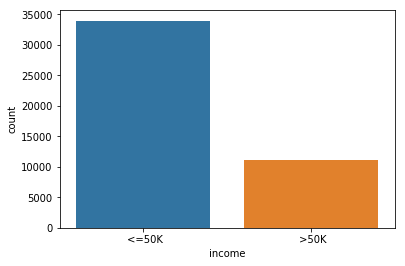

In [10]:
sns.countplot(income_df['income'])
display(pd.crosstab(index=income_df['income'],columns='count'))

### Numeric Variables

#### Age

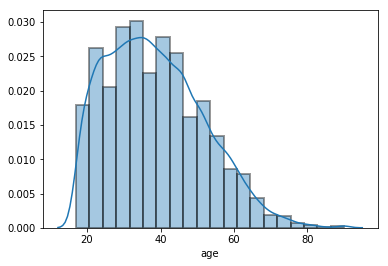

In [11]:
sns.distplot(income_df["age"],bins = 20, hist_kws=dict(edgecolor="k", linewidth=2))



#### fnlwgt
This variable may need to be excluded in order to prevent leakage. 

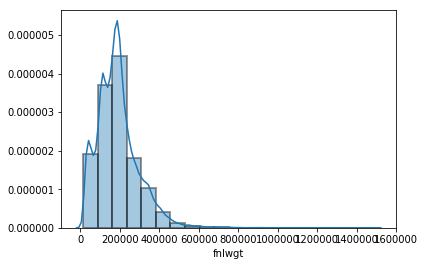

In [12]:
sns.distplot(income_df['fnlwgt'],bins = 20, hist_kws=dict(edgecolor="k", linewidth=2))

#### Education Number

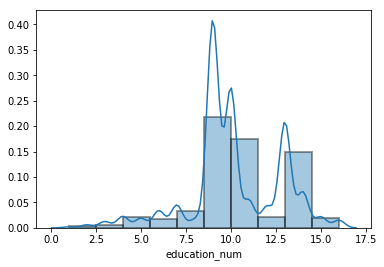

In [13]:
sns.distplot(income_df["education_num"],bins = 10, hist_kws=dict(edgecolor="k", linewidth=2))

#### Capital Gain
Notice that there exists a very extreme value at the right side of the distribution plot, which indicating potential mistake in data collecting process

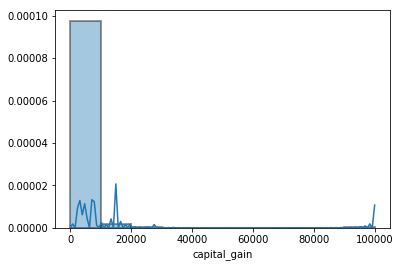

In [14]:
sns.distplot(income_df["capital_gain"],bins = 10, hist_kws=dict(edgecolor="k", linewidth=2))

In [15]:
# explore the extreme values
income_df[income_df['capital_gain']>60000]

print('The observations with capital ',np.sum(income_df.income[income_df['capital_gain']>60000] != ' >50K'))
# Note that people with all the extreme values have income larger than 50K
# This indicates that we can discrete this feature to predict the response variable before applying our model

The observations with capital  0


For instances with a feature larger than 60000, the income is higher than 50K. Thus, before building the model, we can use it as a filter to increase the prediction precision. 

#### Capital Loss

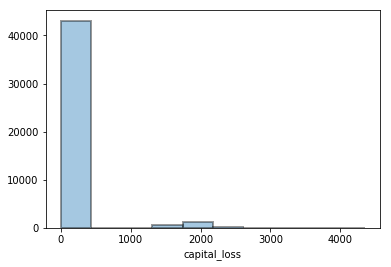

In [16]:
# histogram
cap_loss=sns.distplot(income_df["capital_loss"],bins = 10, hist_kws=dict(edgecolor="k", linewidth=2),kde=False)

#income_df[income_df.capital_loss>1000]

#### Hour_Per_ Week

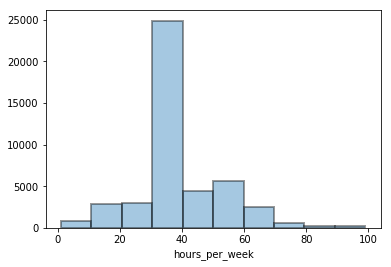

In [17]:
cap_loss=sns.distplot(income_df["hours_per_week"],bins = 10, hist_kws=dict(edgecolor="k", linewidth=2),kde=False)


### Categorical Variables

#### Education
In order to reduce the dimensions, we map the classes of education to new values 

col_0,count
education,
10th,1223
11th,1619
12th,575
1st-4th,220
5th-6th,447
7th-8th,822
9th,676
Assoc-acdm,1507
Assoc-voc,1958


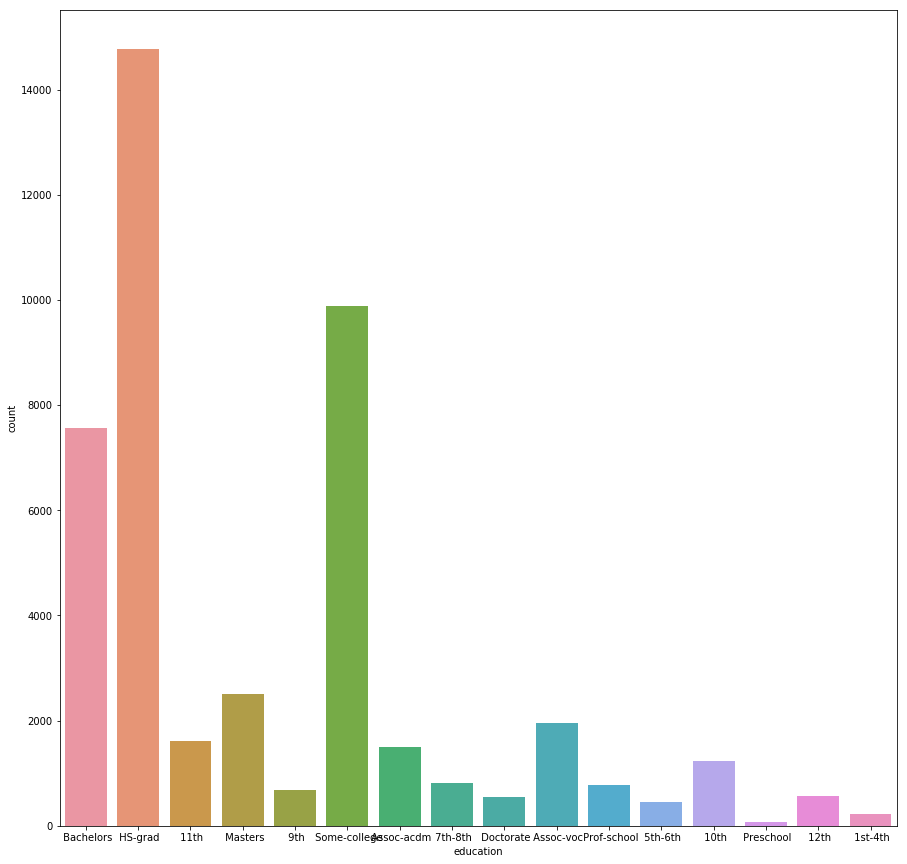

In [18]:
from matplotlib import pyplot as plt
plt.figure(figsize = (15,15))
sns.countplot(income_df.education)
pd.crosstab(index=income_df["education"], columns="count")

In [19]:
# Education mapping
education_mapping = pd.read_csv('Education mapping.csv')

education_mapping['education'] = education_mapping['education'].str.strip()

# remove space in education
income_df['education'] = income_df.education.str.replace(" ",'')
income_df = pd.merge(income_df,education_mapping,on='education',how='left')

income_df.head()

,age,work_class,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_new
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,Bachelors
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,Bachelors
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,HS-grad
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,HS-dropouts
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,Bachelors


#### Native Country
We olny keep US and map other values to their continents

In [20]:
# Native country mapping
countries_mapping = pd.read_csv('Native Country Mapping.csv')

countries_mapping['native_country'] = countries_mapping['native_country'].str.strip()

income_df['native_country'] = income_df.native_country.str.lstrip()
income_df = pd.merge(income_df,countries_mapping,on='native_country',how='left')

income_df.head()

,age,work_class,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_new,native_country_new
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,Bachelors,US
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,Bachelors,US
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,HS-grad,US
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,HS-dropouts,US
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,Bachelors,South America


### Add a new column
We add the net capital gain to the data 

In [21]:
# Create a new column net gain
income_df['net_capital_gain'] = income_df['capital_gain'] - income_df['capital_loss']
income_df.head()

,age,work_class,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_new,native_country_new,net_capital_gain
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,Bachelors,US,2174.0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,Bachelors,US,0.0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,HS-grad,US,0.0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,HS-dropouts,US,0.0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,Bachelors,South America,0.0


### Separate the Dummy Variables

In [22]:
#separate dummies
income_df = pd.get_dummies(data=income_df, columns=['work_class', 'education_new', 'martial_status', 'occupation', 'relationship', 'race', 'native_country_new'])

income_df.head()

,age,fnlwgt,education,education_num,sex,capital_gain,capital_loss,hours_per_week,native_country,income,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native_country_new_Asia,native_country_new_Europe,native_country_new_North America,native_country_new_South America,native_country_new_US
0,39,77516.0,Bachelors,13.0,Male,2174.0,0.0,40.0,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,1
1,50,83311.0,Bachelors,13.0,Male,0.0,0.0,13.0,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,1
2,38,215646.0,HS-grad,9.0,Male,0.0,0.0,40.0,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,1
3,53,234721.0,11th,7.0,Male,0.0,0.0,40.0,United-States,<=50K,...,0,0,1,0,0,0,0,0,0,1
4,28,338409.0,Bachelors,13.0,Female,0.0,0.0,40.0,Cuba,<=50K,...,0,0,1,0,0,0,0,0,1,0


# Model (cross validation)

## Filter With capital_gain == 99999

## Data Splitting

## Logistic Regression

## Probability Tree

## k-NN

# Evaluation

## Learning Curve

## ROC

## Fitting Plot
 

## Confusian Matrix